## imports

In [66]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
from keras import Input
from keras.utils import to_categorical
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU

import tensorflow



# Carga de imagenes a memoria

In [67]:
dirname = os.path.join(os.getcwd(), 'imagenes')
imgpath = dirname + os.sep

images = []
directories = []
dircount = []
cant=0


print("leyendo imagenes de ",imgpath)


# for root, dirnames, filenames in os.walk(imgpath):
#     print(root)
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            imagen = plt.imread(filepath)
            images.append(imagen)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
    if (re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename)):
        print(root, cant)
        directories.append(root)
        dircount.append(cant)
        cant=0
dircount.append(cant)

# dircount = dircount[1:]
# dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  c:\Users\Loren\Desktop\Facu\Inteligencia Artificial\visual_IA\Redes_convolucionales\Redes_neu_c-CNN\imagenes\
c:\Users\Loren\Desktop\Facu\Inteligencia Artificial\visual_IA\Redes_convolucionales\Redes_neu_c-CNN\imagenes\basket 8823
c:\Users\Loren\Desktop\Facu\Inteligencia Artificial\visual_IA\Redes_convolucionales\Redes_neu_c-CNN\imagenes\beisball 7752
c:\Users\Loren\Desktop\Facu\Inteligencia Artificial\visual_IA\Redes_convolucionales\Redes_neu_c-CNN\imagenes\boxeo 7125
c:\Users\Loren\Desktop\Facu\Inteligencia Artificial\visual_IA\Redes_convolucionales\Redes_neu_c-CNN\imagenes\ciclismo 7533
c:\Users\Loren\Desktop\Facu\Inteligencia Artificial\visual_IA\Redes_convolucionales\Redes_neu_c-CNN\imagenes\f1 5053
c:\Users\Loren\Desktop\Facu\Inteligencia Artificial\visual_IA\Redes_convolucionales\Redes_neu_c-CNN\imagenes\futbol 7617
c:\Users\Loren\Desktop\Facu\Inteligencia Artificial\visual_IA\Redes_convolucionales\Redes_neu_c-CNN\imagenes\golf 9768
c:\Users\Loren\Desktop\Fa

# Etiquetas y clases

In [68]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1

y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy

classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Cantidad etiquetas creadas:  67780
0 basket
1 beisball
2 boxeo
3 ciclismo
4 f1
5 futbol
6 golf
7 natacion
8 tenis
Total number of outputs :  9
Output classes :  [0 1 2 3 4 5 6 7 8]


In [69]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2) #tomo el 20% para test
print('Training data shape : ', train_X.shape, train_Y.shape) #en el print sale cant img train- (21x28)dim img- RGB
print('Testing data shape : ', test_X.shape, test_Y.shape)

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

# one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# original y post one-hot encoding
print('Original label:', train_Y[0])
print('Luego de one-hot:', train_Y_one_hot[0])

train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13) #datos de validacion, 20% del train

print("Entrenamiento  ",train_X.shape," Validacion",valid_X.shape,train_label.shape,valid_label.shape)

Training data shape :  (54224, 21, 28, 3) (54224,)
Testing data shape :  (13556, 21, 28, 3) (13556,)
Original label: 0
Luego de one-hot: [1. 0. 0. 0. 0. 0. 0. 0. 0.]
Entrenamiento   (43379, 21, 28, 3)  Validacion (10845, 21, 28, 3) (43379, 9) (10845, 9)


In [70]:
INIT_LR = 1e-3

# modelo = Sequential()
# modelo.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(21,28,3))) #21x28x3
# modelo.add(LeakyReLU(alpha=0.1)) 
# modelo.add(MaxPooling2D((2, 2),padding='same'))# 21x28->11x14 
# modelo.add(Dropout(0.5)) #para evitar overfitting

# modelo.add(Flatten()) #aplano
# modelo.add(Dense(32, activation='linear'))# capa de 32 nauronas-> 2^5
# modelo.add(LeakyReLU(alpha=0.1))
# modelo.add(Dropout(0.5)) 
# modelo.add(Dense(nClasses, activation='softmax'))# capa de tantas neuronas como clases, creo que deberia ser pot de 2

# modelo.summary()
# #compilador y optimizador
# modelo.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adagrad(lr=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

intento de arq similar alexnet

In [71]:
# INIT_LR = 1e-3

# modelo = Sequential()
# modelo.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(21,28,3)))
# modelo.add(MaxPooling2D((2, 2),padding='same'))
# modelo.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(21,28,3)))
# modelo.add(MaxPooling2D((2, 2),padding='same'))
# modelo.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(21,28,3)))
# modelo.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(21,28,3)))
# modelo.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(21,28,3)))
# modelo.add(MaxPooling2D((2, 2),padding='same'))


# modelo.summary()

# modelo.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adagrad(lr=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

intento 2

In [72]:
modelo = keras.Sequential()
modelo.add(Conv2D(filters=96, kernel_size=(11, 11), 
                        strides=(4, 4), activation="relu", 
                        input_shape=(21, 28, 3)))
modelo.add(BatchNormalization())
modelo.add(MaxPooling2D(pool_size=(3, 3), strides= (2, 2)))
modelo.add(Conv2D(filters=256, kernel_size=(5, 5), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
modelo.add(BatchNormalization())
modelo.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
modelo.add(Conv2D(filters=384, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
modelo.add(BatchNormalization())
modelo.add(Conv2D(filters=384, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
modelo.add(BatchNormalization())
modelo.add(Conv2D(filters=256, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
modelo.add(BatchNormalization())
modelo.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
modelo.add(Flatten())
modelo.add(Dense(4096, activation="relu"))
modelo.add(Dropout(0.5))
modelo.add(Dense(10, activation="softmax"))
modelo.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tensorflow.optimizers.SGD(lr=0.001), 
              metrics=['accuracy'])
modelo.summary()

ValueError: Exception encountered when calling layer "max_pooling2d_18" (type MaxPooling2D).

Negative dimension size caused by subtracting 3 from 1 for '{{node max_pooling2d_18/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 3, 1], padding="VALID", strides=[1, 2, 2, 1]](Placeholder)' with input shapes: [?,1,2,256].

Call arguments received by layer "max_pooling2d_18" (type MaxPooling2D):
  • inputs=tf.Tensor(shape=(None, 1, 2, 256), dtype=float32)

In [ ]:
epochs = 6
batch_size = 64
entrenamiento= modelo.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

# guardo la red
modelo.save("superIA3000")

Epoch 1/6


ValueError: in user code:

    File "C:\Users\Loren\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Loren\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Loren\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Loren\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Loren\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Loren\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_8" is incompatible with the layer: expected shape=(None, 227, 227, 3), found shape=(None, 21, 28, 3)


Utilizo el modelo guardado para que clasifique imagenes que nunca vio

In [ ]:
test_eval = modelo.evaluate(test_X, test_Y_one_hot, verbose=1)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

424/424 [==============================] - 2s 4ms/step - loss: 0.7953 - accuracy: 0.8341
Test loss: 0.7952771782875061
Test accuracy: 0.8340955972671509


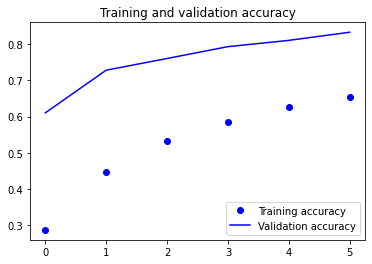

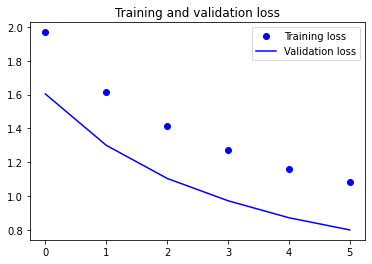

In [ ]:
accuracy = entrenamiento.history['accuracy']
val_accuracy = entrenamiento.history['val_accuracy']
loss = entrenamiento.history['loss']
val_loss = entrenamiento.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()